In [18]:
import geopandas as gpd
import numpy as np 
import pandas

In [26]:
minx, miny, maxx, maxy = img.bounds


In [28]:
minx

665000.0

<Axes: >

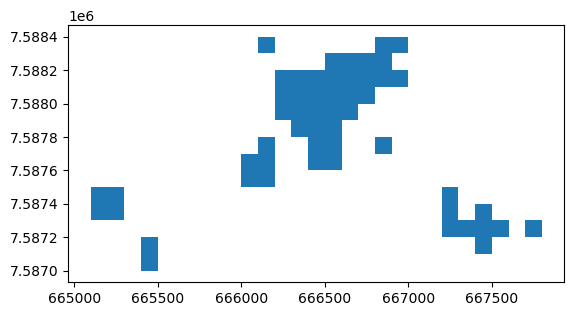

In [24]:
# import the 100x100 meter rutor data (all rutor all of Sweden)
df_pals_rutor = gpd.read_file("/Users/nadja/Documents/UU/Thesis/data/Vector/palsaShape/RUTNAT_100x100M_PALS_OR_PALSVATT_ALL.shp")

# save a subset of the 100x100 meter rutor corresponding to the image to be used below
img_rutor = df_pals_rutor.cx[int(img.bounds.left):int(img.bounds[2]), int(img.bounds[1]):int(img.bounds[3])] # coordinates derived manually from plotting img
img_rutor.plot() # plot rutor

<Axes: >

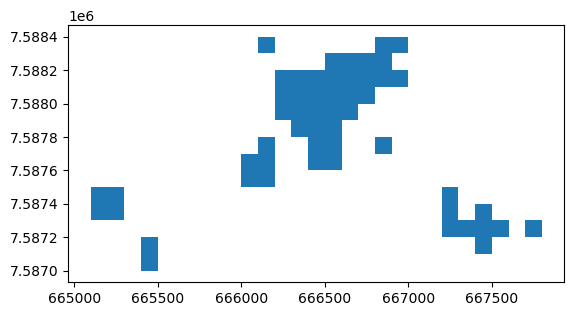

In [10]:
# import the 100x100 meter rutor data (all rutor all of Sweden)
df_pals_rutor = gpd.read_file("/Users/nadja/Documents/UU/Thesis/data/Vector/palsaShape/RUTNAT_100x100M_PALS_OR_PALSVATT_ALL.shp")

# save a subset of the 100x100 meter rutor corresponding to the image to be used below
img_rutor = df_pals_rutor.cx[665000:670000, 7585000:7590000] # coordinates derived manually from plotting img
img_rutor.plot() # plot rutor

In [11]:
img_rutor.crs

<Projected CRS: PROJCS["SWEREF99_TM",GEOGCS["GCS_SWEREF99",DATUM[" ...>
Name: SWEREF99 TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
# with rasterio open tif image corresponding to the above

import rasterio
img = rasterio.open("/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/758_66_55_2018.tif")

<Axes: >

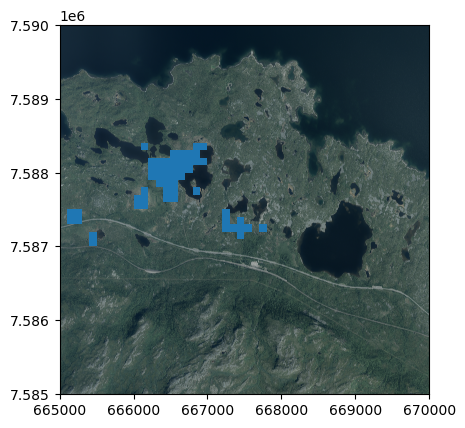

In [14]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
ax = show(img, extent=extent, ax=ax, cmap="pink")

img_rutor.plot(ax=ax)

In [31]:
type(img)

rasterio.io.DatasetReader

In [32]:
img.bounds

BoundingBox(left=665000.0, bottom=7585000.0, right=670000.0, top=7590000.0)

In [ ]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import os

# Load the TIF file
tif_data = img.read()
tif_meta = img.meta

# Load the GeoDataFrame with polygons
polygons_gdf = gpd.read_file("path/to/your/polygons.shp")


# Iterate over each polygon in the GeoDataFrame
for idx, polygon in enumerate(polygons_gdf.geometry):
    # Crop the TIF file using the polygon
    cropped_data, cropped_transform = mask(img, [polygon], crop=True)

    # Update the metadata for the cropped TIF
    cropped_meta = tif_meta.copy()
    cropped_meta.update({"driver": "GTiff",
                         "height": cropped_data.shape[1],
                         "width": cropped_data.shape[2],
                         "transform": cropped_transform})

    # Save the cropped TIF file with a unique name
    output_path = os.path.join(self.destination_path, f"cropped_{idx}.tif")
    with rasterio.open(output_path, "w", **cropped_meta) as dest:
        dest.write(cropped_data)

In [33]:
from rasterio.mask import mask

tif_data = img.read()
tif_meta = img.meta

# Select the specific polygon you want to use for cropping
polygon = img_rutor.geometry[8311]  # Assuming you want to use the first polygon

# Crop the TIF file using the polygon
cropped_data, cropped_transform = mask(img, [polygon], crop=True)

# Update the metadata for the cropped TIF
cropped_meta = tif_meta.copy()
cropped_meta.update({"driver": "GTiff",
                     "height": cropped_data.shape[1],
                     "width": cropped_data.shape[2],
                     "transform": cropped_transform})

# Save the cropped TIF file
with rasterio.open("/Users/nadja/Documents/UU/Thesis/generated_tifs/cropped.tif", "w", **cropped_meta) as dest:
    dest.write(cropped_data)


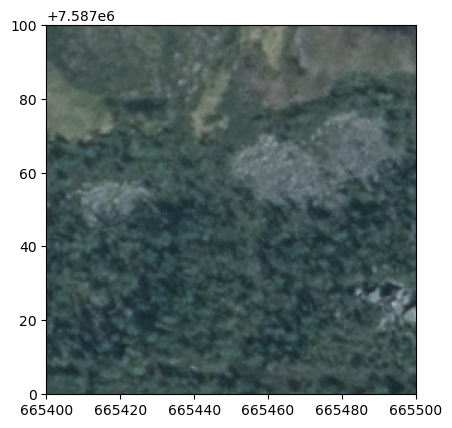

In [34]:
cropped_img = rasterio.open("/Users/nadja/Documents/UU/Thesis/generated_tifs/cropped.tif")
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [cropped_img.bounds[0], cropped_img.bounds[2], cropped_img.bounds[1], cropped_img.bounds[3]]
ax = show(cropped_img, extent=extent, ax=ax, cmap="pink")

In [35]:
cropped_img.bounds

BoundingBox(left=665400.0, bottom=7587000.0, right=665500.0, top=7587100.0)

In [37]:
img_rutor.geometry[8311].bounds

(665400.0, 7587000.0, 665500.0, 7587100.0)

In [26]:
type(cropped_transform)

affine.Affine

In [ ]:
import rasterio
from rasterio.mask import mask

# Load the TIF file
with rasterio.open("path/to/your/tif/file.tif") as src:
    # Read the TIF data and metadata
    tif_data = src.read()
    tif_meta = src.meta

# Load the GeoDataFrame with polygons
polygons_gdf = gpd.read_file("path/to/your/polygons.shp")

# Select the specific polygon you want to use for cropping
polygon = polygons_gdf.geometry[0]  # Assuming you want to use the first polygon

# Crop the TIF file using the polygon
cropped_data, cropped_transform = mask(src, [polygon], crop=True)

# Update the metadata for the cropped TIF
cropped_meta = tif_meta.copy()
cropped_meta.update({"driver": "GTiff",
                     "height": cropped_data.shape[1],
                     "width": cropped_data.shape[2],
                     "transform": cropped_transform})

# Save the cropped TIF file
with rasterio.open("path/to/save/cropped.tif", "w", **cropped_meta) as dest:
    dest.write(cropped_data)

In [8]:
import os 
import json 

config_path = os.path.join(os.getcwd(), 'configs.json')
with open(config_path, 'r') as config_file:
    configs = json.load(config_file)

config_paths = configs.get('paths', {})
original_tif_dir = config_paths.get('original_tif_dir')

In [9]:
original_tif_dir

'/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB'